# Filters are easy

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import convolve

(300, 300, 4)

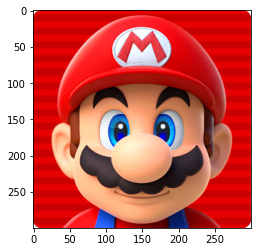

In [2]:
# loading image
img = mpimg.imread('super_mario_head.png')
#img = mpimg.imread('nature.png')
plt.imshow(img)
img.shape

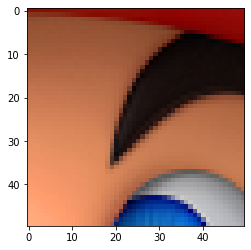

In [3]:
# cutting the image
eye_brow = img[100:150,150:200,]
plt.imshow(eye_brow,interpolation='nearest')

# Kernels

In [4]:
kernel_edge_detect3 = np.array([[-1.,-1.,-1.],
                                [-1.,8.,-1.],
                                [-1.,-1.,-1.]])

kernel_sharpen2 = np.array([[-1.,-1.,-1.],
                           [-1.,9.,-1.],
                           [-1.,-1.,-1.]])

kernel_blur = np.array([[1.,1.,1.],
                        [1.,1.,1.],
                        [1.,1.,1.]])

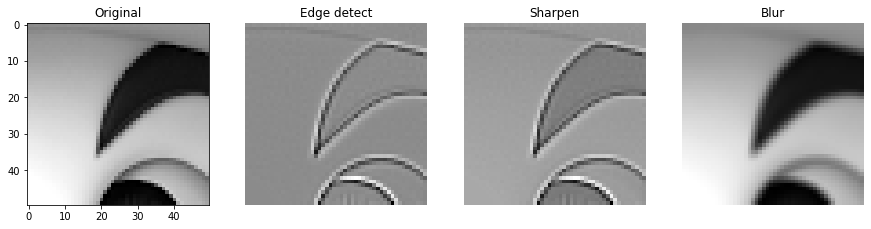

In [5]:
img_edge_detect = convolve(eye_brow[:,:,0], kernel_edge_detect3)
img_sharpen = convolve(eye_brow[:,:,0], kernel_sharpen2)
img_blur = convolve(eye_brow[:,:,0], kernel_blur)

# creates sub plots of 15x15
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4,figsize=(15,15))

plt1.set_title('Original');plt1.imshow(eye_brow[:,:,0],cmap='gray', interpolation='nearest');
# showing each channel img[x,y,color_plane] 
plt2.axis('off');plt2.set_title('Edge detect');plt2.imshow(img_edge_detect,cmap='gray', interpolation='nearest');
plt3.axis('off');plt3.set_title('Sharpen');plt3.imshow(img_sharpen,cmap='gray', interpolation='nearest');
plt4.axis('off');plt4.set_title('Blur');plt4.imshow(img_blur,cmap='gray', interpolation='nearest');

In [6]:
img_blur0 = convolve(eye_brow[:,:,0], kernel_blur)
img_blur1 = convolve(eye_brow[:,:,1], kernel_blur)
img_blur2 = convolve(eye_brow[:,:,2], kernel_blur) 
img_blur3 = convolve(eye_brow[:,:,3], kernel_blur)


img_end = np.dstack([img_blur0, img_blur1, img_blur2, img_blur3])

# Convolution it's a simple operation
Source: https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html

# You can apply filters using [convolution even with **ffmpeg**](https://ffmpeg.org/ffmpeg-filters.html#convolution)

In [7]:
#Kernel gaussiano é muito útil para as operações a seguir
kernel_gaussian = np.array([[1/16,1/8,1/16],
                                [1/8,1/4,1/8],
                                [1/16,1/8,1/16]])

##Filtros R, G, B

In [8]:
## Red

img_red0 = convolve(img[:,:,0], 3*kernel_gaussian)
img_red = np.dstack([img_red0, img[:,:,1], img[:,:,2], img[:,:,3]]) 
img_red = np.where(img_red < 1, img_red, 1)

##Green

img_green1 = convolve(img[:,:,1], 3*kernel_gaussian)
img_green = np.dstack([img[:,:,0], img_green1, img[:,:,2], img[:,:,3]]) 
img_green = np.where(img_green < 1, img_green, 1)

## Blue

img_blue2 = convolve(img[:,:,2], 3*kernel_gaussian)
img_blue = np.dstack([img[:,:,0], img[:,:,1], img_blue2, img[:,:,3]]) 
img_blue = np.where(img_blue < 1, img_blue, 1)

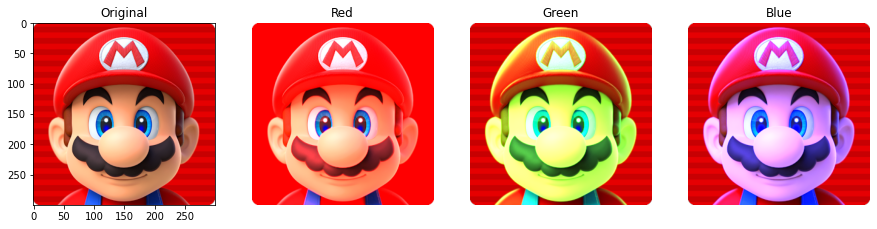

In [9]:
# creates sub plots of 15x15
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4,figsize=(15,15))

plt1.set_title('Original');plt1.imshow(img);
# showing each channel img[x,y,color_plane] 
plt2.axis('off');plt2.set_title('Red');plt2.imshow(img_red);
plt3.axis('off');plt3.set_title('Green');plt3.imshow(img_green);
plt4.axis('off');plt4.set_title('Blue');plt4.imshow(img_blue);

##Filtro vintage

In [10]:
img_vintage0 = convolve(img[:,:,0], 2*kernel_gaussian)
img_vintage1 = convolve(img[:,:,1], 1.5*kernel_gaussian)
img_vintage2 = convolve(img[:,:,1], 0.2*kernel_gaussian)

#img_vintage = np.dstack([img_vintage0, img_vintage1, img[:,:,2], img[:,:,3]]) 
img_vintage = np.dstack([img_vintage0, img_vintage1, img_vintage2, img[:,:,3]]) 
img_vintage = np.where(img_vintage < 1, img_vintage, 1)
img_vintage = img_vintage/1.4

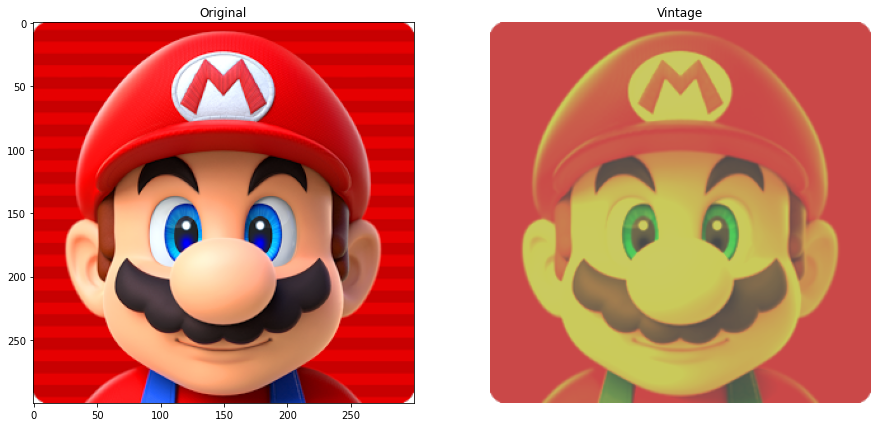

In [11]:
f, (plt1, plt2) = plt.subplots(1, 2,figsize=(15,15))

plt1.set_title('Original');plt1.imshow(img);
plt2.axis('off');plt2.set_title('Vintage');plt2.imshow(img_vintage);

##Filtro Linear Contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


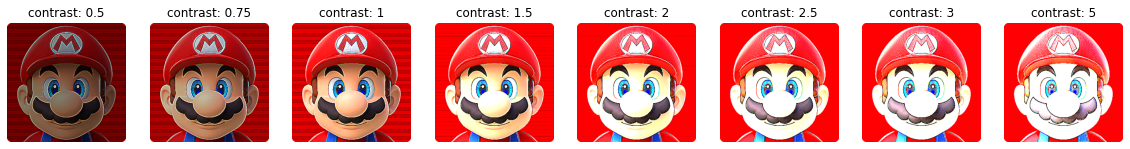

In [12]:
c = [0.5, 0.75, 1, 1.5, 2, 2.5, 3, 5]
plt.figure(figsize=(20, 20)) 
for i in range(len(c)):
  img_linear0 = convolve(img[:,:,0], c[i]*kernel_sharpen2)
  img_linear1 = convolve(img[:,:,1], c[i]*kernel_sharpen2)
  img_linear2 = convolve(img[:,:,2], c[i]*kernel_sharpen2)

  img_linear = np.dstack([img_linear0, img_linear1, img_linear2, img[:,:,3]]) 
  img_linear = np.where(img_linear < 1, img_linear, 1)

  plt.subplot(1,8,i+1)
  plt.title("contrast: " + str(c[i]))
  plt.axis('off')
  plt.imshow(img_linear)